.. index:: Grid construction; Filtered grid views

# FilteredGridView examples

In this example we use `filteredGridView` to filter out parts of a given
grid view.

In [1]:

from ufl import SpatialCoordinate, dot
from dune.grid import cartesianDomain
from dune.alugrid import aluConformGrid as leafGridView
from dune.fem.view import filteredGridView
from dune.fem.space import lagrange

Create a host grid view of the underlying grid as usual.

In [2]:

gridView = leafGridView( cartesianDomain([0,0],[1,1],[16,16]) )

Now create a `filteredGridView` with a simple callable specifying which element belongs to the new domain.

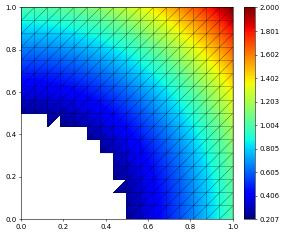

number of dofs: 1089 integral over filtered domain 0.6413014729817705


In [3]:

filteredView = filteredGridView(gridView, lambda e: e.geometry.center.two_norm > 0.5, domainId=1)
space = lagrange(filteredView, order=2)
x = SpatialCoordinate(space)
solution = space.interpolate(dot(x,x),name="solution")
solution.plot()
print("number of dofs:", solution.size,\
      "integral over filtered domain",solution.integrate())

Revert the filter and create a `filteredGridView` with also provides an overloaded index set
with a consecutive index for the entities belonging to the new domain.

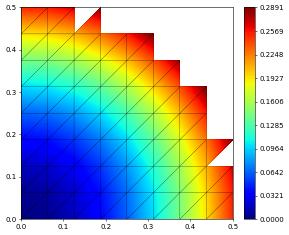

number of dofs: 239 integral over filtered domain 0.025365193684895825


In [4]:
filteredView = filteredGridView(gridView, lambda e: e.geometry.center.two_norm < 0.5, domainId=1,
                                useFilteredIndexSet=True)
space = lagrange(filteredView, order=2)
x = SpatialCoordinate(space)
solution = space.interpolate(dot(x,x),name="solution")
solution.plot()
print("number of dofs:", solution.size,\
      "integral over filtered domain",solution.integrate())

Compare with the original grid view.

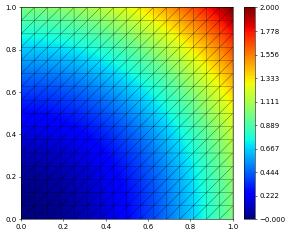

number of dofs: 1089 integral over filtered domain 0.6666666666666667


In [5]:
space = lagrange(gridView, order=2)
solution = space.interpolate(dot(x,x),name="solution")
solution.plot()
print("number of dofs:", solution.size,\
      "integral over filtered domain",solution.integrate())